## Project Overview

Understanding drug side effects is essential for patient safety and healthcare planning.
This project analyzes drug-related datasets to explore side-effect patterns and distributions.

## Importing Required Libraries

Libraries for numerical computation and visualization are imported
to support medical data analysis.

In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Dataset

The drug dataset is loaded into a DataFrame, enabling structured analysis
of drug names, effects, and related attributes.

In [188]:
# Load your dataset
df = pd.read_csv('/Users/yashikasharma/Downloads/drugs_side_effects_drugs_com.csv')
# Display the first few rows of the dataset
df.head()

,drug_name,medical_condition,side_effects,generic_name,drug_classes,brand_names,activity,rx_otc,pregnancy_category,csa,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews,drug_link,medical_condition_url
0,doxycycline,Acne,"(hives, difficult breathing, swelling in your ...",doxycycline,"Miscellaneous antimalarials, Tetracyclines","Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alod...",87%,Rx,D,N,X,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,6.8,760.0,https://www.drugs.com/doxycycline.html,https://www.drugs.com/condition/acne.html
1,spironolactone,Acne,hives ; difficulty breathing; swelling of your...,spironolactone,"Aldosterone receptor antagonists, Potassium-sp...","Aldactone, CaroSpir",82%,Rx,C,N,X,amlodipine: https://www.drugs.com/amlodipine.h...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.2,449.0,https://www.drugs.com/spironolactone.html,https://www.drugs.com/condition/acne.html
2,minocycline,Acne,"skin rash, fever, swollen glands, flu-like sym...",minocycline,Tetracyclines,"Dynacin, Minocin, Minolira, Solodyn, Ximino, V...",48%,Rx,D,N,NaN,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,5.7,482.0,https://www.drugs.com/minocycline.html,https://www.drugs.com/condition/acne.html
3,Accutane,Acne,problems with your vision or hearing; muscle o...,isotretinoin (oral),"Miscellaneous antineoplastics, Miscellaneous u...",NaN,41%,Rx,X,N,X,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.9,623.0,https://www.drugs.com/accutane.html,https://www.drugs.com/condition/acne.html
4,clindamycin,Acne,hives ; difficult breathing; swelling of your ...,clindamycin topical,"Topical acne agents, Vaginal anti-infectives","Cleocin T, Clindacin ETZ, Clindacin P, Clindag...",39%,Rx,B,N,NaN,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.4,146.0,https://www.drugs.com/mtm/clindamycin-topical....,https://www.drugs.com/condition/acne.html


In [189]:
#Shape of data
df.shape

(2931, 17)

In [190]:
#Columns in the dataset
df.columns

Index(['drug_name', 'medical_condition', 'side_effects', 'generic_name',
       'drug_classes', 'brand_names', 'activity', 'rx_otc',
       'pregnancy_category', 'csa', 'alcohol', 'related_drugs',
       'medical_condition_description', 'rating', 'no_of_reviews', 'drug_link',
       'medical_condition_url'],
      dtype='object')

In [191]:
#Show the main information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2931 entries, 0 to 2930
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   drug_name                      2931 non-null   object 
 1   medical_condition              2931 non-null   object 
 2   side_effects                   2807 non-null   object 
 3   generic_name                   2888 non-null   object 
 4   drug_classes                   2849 non-null   object 
 5   brand_names                    1718 non-null   object 
 6   activity                       2931 non-null   object 
 7   rx_otc                         2930 non-null   object 
 8   pregnancy_category             2702 non-null   object 
 9   csa                            2931 non-null   object 
 10  alcohol                        1377 non-null   object 
 11  related_drugs                  1462 non-null   object 
 12  medical_condition_description  2931 non-null   o

In [192]:
# So, let's check the categorical values
# For Rx_OTC
print(df["rx_otc"].unique())
# For pregnancy categories
print(df["pregnancy_category"].unique())

['Rx' 'Rx/OTC' 'OTC' nan]
['D' 'C' 'X' 'B' 'N' nan 'A']


## Data Exploration

This step examines:
- Common side effects
- Frequency distributions
- Missing values

Understanding data structure is crucial before drawing conclusions.

In [193]:
# Check for missing values
df.isnull().sum()

drug_name                           0
medical_condition                   0
side_effects                      124
generic_name                       43
drug_classes                       82
brand_names                      1213
activity                            0
rx_otc                              1
pregnancy_category                229
csa                                 0
alcohol                          1554
related_drugs                    1469
medical_condition_description       0
rating                           1345
no_of_reviews                    1345
drug_link                           0
medical_condition_url               0
dtype: int64

In [194]:
#Handle Missing Values

# Fill with 'Unknown'
df['side_effects'] = df['side_effects'].fillna('Unknown')

# Fill missing with Brand Name (if available)
df['generic_name'] = df['generic_name'].fillna(df['brand_names'])

# For still-missing values, mark as 'Unknown'
df['generic_name'] = df['generic_name'].fillna('Unknown')

# Fill missing with 'Unknown'
df['drug_classes'] = df['drug_classes'].fillna('Unknown')

# Fill with Generic Name if available
df['brand_names'] = df['brand_names'].fillna(df['generic_name'])

# If still missing, fill with 'Unknown'
df['brand_names'] = df['brand_names'].fillna('Unknown')

# Fill missing with 'Unknown'
df['rx_otc'] = df['rx_otc'].fillna('Unknown')

# Fill missing with 'Unknown'
df['pregnancy_category'] = df['pregnancy_category'].fillna('Unknown')

# In the alcohol column we have X and null(NaN) values, because the drug can interact with alcohol or not.
# Therefore, let's replace the values of alcohol column with boolean values.
# Let X will be 1 of interaction, NaN will be 0.
df['alcohol']=df['alcohol'].replace(np.NaN, '0')
df['alcohol']=df['alcohol'].replace({'X': 1})

# Fill missing with 'Unknown'
df['related_drugs'] = df['related_drugs'].fillna('Unknown')

# Fill missing per drug with that drug’s median
df['rating'] = df.groupby('drug_name')['rating'].transform(lambda x: x.fillna(x.median()))
df['rating'] = df['rating'].fillna(df['rating'].median())

# Fill missing with 0
df['no_of_reviews'] = df['no_of_reviews'].fillna(0).astype(int)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out

In [195]:
# Check for missing values
df.isnull().sum()

drug_name                        0
medical_condition                0
side_effects                     0
generic_name                     0
drug_classes                     0
brand_names                      0
activity                         0
rx_otc                           0
pregnancy_category               0
csa                              0
alcohol                          0
related_drugs                    0
medical_condition_description    0
rating                           0
no_of_reviews                    0
drug_link                        0
medical_condition_url            0
dtype: int64

In [196]:
# Convert 'activity' column:
# 1. Cast to string
# 2. Remove whitespace
# 3. Strip '%' from the end
# 4. Convert to float
# 5. Divide by 100 to get fraction
df['activity'] = (
    df['activity']
      .astype(str)                # ensure string
      .str.replace(r'\s+', '', regex=True)  # remove whitespace
      .str.rstrip('%')             # remove trailing %
      .astype(float) / 100         # convert to fraction
)

# Display the updated 'activity' column
print(df['activity'].head())

0    0.87
1    0.82
2    0.48
3    0.41
4    0.39
Name: activity, dtype: float64


In [197]:
#Summary statistics
df.describe()

,activity,rating,no_of_reviews
count,2931.000000,2931.000000,2931.000000
mean,0.084504,6.898806,40.618560
std,0.169333,1.705284,141.046113
min,0.000000,0.000000,0.000000
25%,0.000000,6.800000,0.000000
50%,0.020000,7.000000,1.000000
75%,0.070000,7.300000,15.000000
max,1.000000,10.000000,2934.000000


## Visualization

Plots and charts are generated to visually represent drug side-effect patterns.

Visualization helps identify dominant effects and anomalies in the dataset.

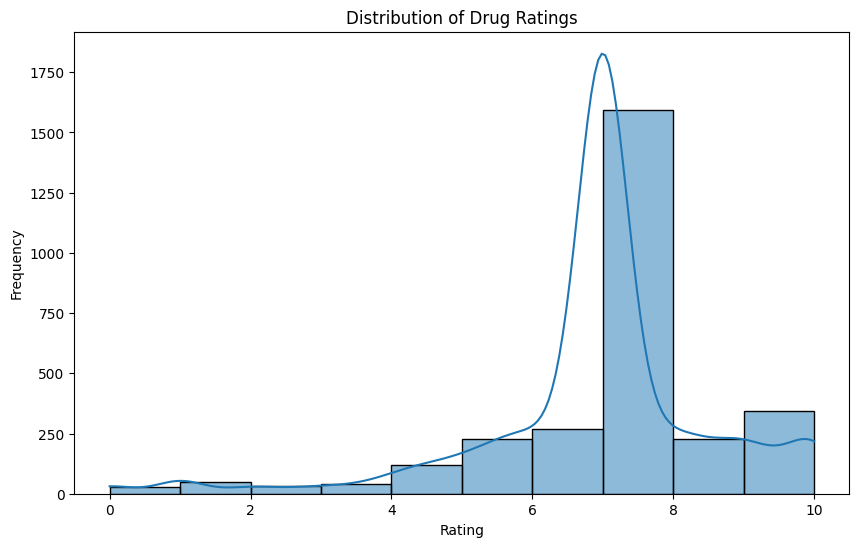

In [198]:
# Distribution of drug ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], bins=10, kde=True)
plt.title('Distribution of Drug Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

Top drugs by condition

In [199]:
# Count the most common drugs for each medical condition
top_drugs = df.groupby('medical_condition')['drug_name'].value_counts().nlargest(10)
print(top_drugs)

medical_condition  drug_name     
Acne               minocycline       2
Eczema             fluocinolone      2
Herpes             acyclovir         2
ADHD               Adderall          1
                   Adderall XR       1
                   Adhansia XR       1
                   Adzenys ER        1
                   Adzenys XR-ODT    1
                   Aptensio XR       1
                   Azstarys          1
Name: count, dtype: int64


In [200]:
# Analyzing the most common side effects
side_effects = df['side_effects'].value_counts().head(10)
print(side_effects)

side_effects
Unknown                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         124
hives ; difficult breathing; swelling of your face, lips, tongue, or throat. This medicine may cause serious side effects. Stop using this medicine and call your doctor at once if you have: redness or swelling of the treated area; increased pain; or severe burning or skin irritation such as a rash, itching, pain, or blistering. Less serious side effects may be more likely, and you may hav

/var/folders/72/10skclyd6r94lwdf4pscr7p40000gn/T/ipykernel_63345/34093042.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


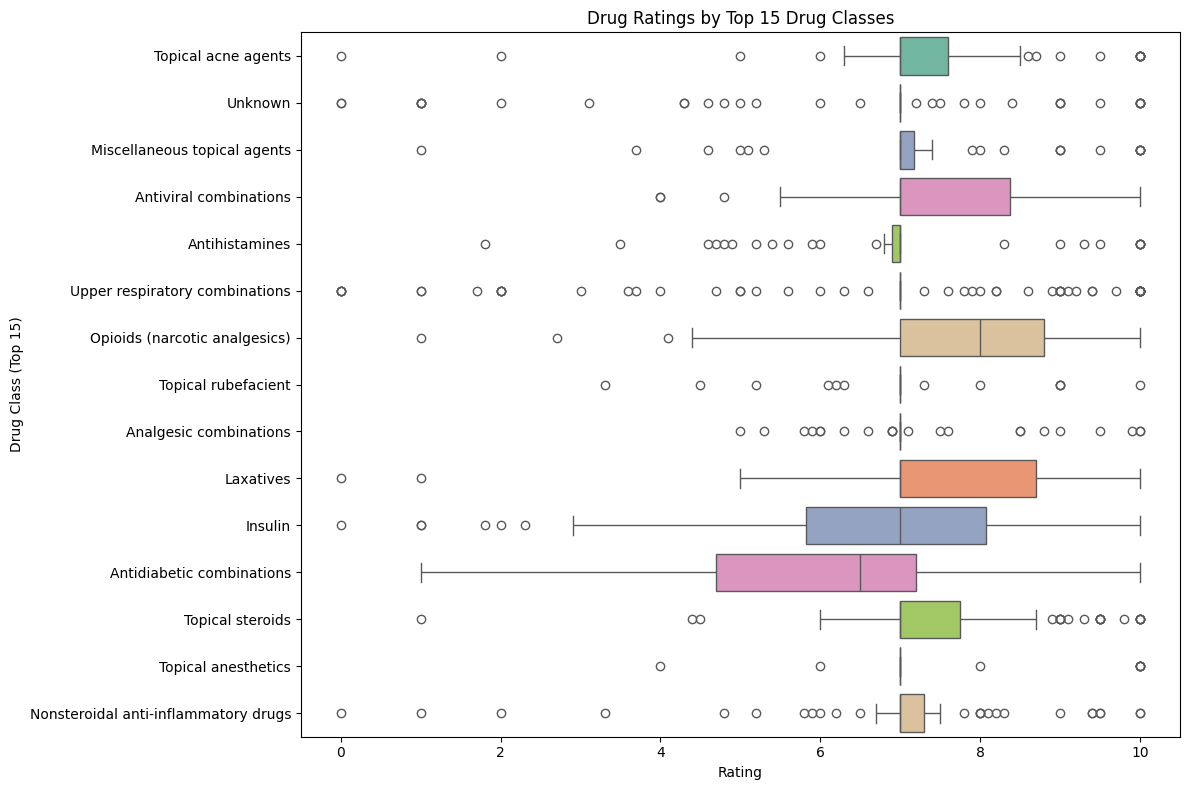

In [201]:
#Boxplot of ratings by drug classes
top_classes = df['drug_classes'].value_counts().head(15).index

plt.figure(figsize=(12, 8))
sns.boxplot(
    y='drug_classes', 
    x='rating', 
    data=df[df['drug_classes'].isin(top_classes)],
    palette="Set2"
)
plt.ylabel("Drug Class (Top 15)")
plt.xlabel("Rating")
plt.title("Drug Ratings by Top 15 Drug Classes")
plt.tight_layout()
plt.show()

Label Encoding

In [ ]:
df2=df.copy()
print(df2.head())

        drug_name medical_condition  \
0     doxycycline              Acne   
1  spironolactone              Acne   
2     minocycline              Acne   
3        Accutane              Acne   
4     clindamycin              Acne   

                                        side_effects         generic_name  \
0  (hives, difficult breathing, swelling in your ...          doxycycline   
1  hives ; difficulty breathing; swelling of your...       spironolactone   
2  skin rash, fever, swollen glands, flu-like sym...          minocycline   
3  problems with your vision or hearing; muscle o...  isotretinoin (oral)   
4  hives ; difficult breathing; swelling of your ...  clindamycin topical   

                                        drug_classes  \
0         Miscellaneous antimalarials, Tetracyclines   
1  Aldosterone receptor antagonists, Potassium-sp...   
2                                      Tetracyclines   
3  Miscellaneous antineoplastics, Miscellaneous u...   
4       Topical acne a

In [203]:
# Save the data
df2.to_csv('drugs_side_effects_drugs_com_version2.csv', index=False)

In [204]:
# Read the new version dataset
df3=pd.read_csv('drugs_side_effects_drugs_com_version2.csv')
df3["pregnancy_category"].unique()

array(['D', 'C', 'X', 'B', 'N', 'Unknown', 'A'], dtype=object)

In [205]:
df3["csa"].unique()

array(['N', '2', '4', 'U', 'M', '5', '3'], dtype=object)

In [206]:
df3["rx_otc"].unique()

array(['Rx', 'Rx/OTC', 'OTC', 'Unknown'], dtype=object)

In [207]:
df3["generic_name"].unique()

array(['doxycycline', 'spironolactone', 'minocycline', ...,
       'fenfluramine', 'phendimetrazine tartrate', 'setmelanotide'],
      dtype=object)

In [208]:
df3["medical_condition"].unique()

array(['Acne', 'ADHD', 'AIDS/HIV', 'Allergies', "Alzheimer's", 'Angina',
       'Anxiety', 'Asthma', 'Bipolar Disorder', 'Bronchitis', 'Cancer',
       'Cholesterol', 'Colds & Flu', 'Constipation', 'COPD', 'Covid 19',
       'Depression', 'Diabetes (Type 1)', 'Diabetes (Type 2)', 'Diarrhea',
       'Eczema', 'Erectile Dysfunction', 'Gastrointestinal',
       'GERD (Heartburn)', 'Gout', 'Hair Loss', 'Hayfever', 'Herpes',
       'Hypertension', 'Hypothyroidism', 'IBD (Bowel)', 'Incontinence',
       'Insomnia', 'Menopause', 'Migraine', 'Osteoarthritis',
       'Osteoporosis', 'Pain', 'Pneumonia', 'Psoriasis',
       'Rheumatoid Arthritis', 'Schizophrenia', 'Seizures', 'Stroke',
       'Swine Flu', 'UTI', 'Weight Loss'], dtype=object)

In [209]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df3["csa"]=label_encoder.fit_transform(df3["csa"])
df3["rx_otc"]=label_encoder.fit_transform(df3["rx_otc"])
df3["generic_name"]=label_encoder.fit_transform(df3["generic_name"])
df3["medical_condition"]=label_encoder.fit_transform(df3["medical_condition"])
df3["pregnancy_category"]=label_encoder.fit_transform(df3["pregnancy_category"])
df3["side_effects"]=label_encoder.fit_transform(df3["side_effects"])

In [210]:
df3["generic_name"].unique()

array([ 643, 1271, 1035, ...,  730, 1158, 1260])

In [211]:
df3["rx_otc"].unique()

array([1, 2, 0, 3])

In [212]:
df3["csa"].unique()

array([5, 0, 2, 6, 4, 3, 1])

In [213]:
df3["side_effects"].unique()

array([  15, 1972, 2697, ..., 1647,  416, 1706])

In [214]:
df3["medical_condition"].unique()

array([ 2,  0,  1,  3,  4,  5,  6,  7,  8,  9, 11, 12, 13, 14, 10, 15, 16,
       17, 18, 19, 20, 21, 23, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46])

In [215]:
df3["pregnancy_category"].unique()

array([3, 2, 6, 1, 4, 5, 0])

In [216]:
df4=pd.DataFrame(df3,columns=('generic_name','medical_condition','no_of_reviews','csa','pregnancy_category','rx_otc','side_effects','rating','alcohol'))

df4.head(10)

,generic_name,medical_condition,no_of_reviews,csa,pregnancy_category,rx_otc,side_effects,rating,alcohol
0,643,2,760,5,3,1,15,6.8,1
1,1271,2,449,5,2,1,1972,7.2,1
2,1035,2,482,5,3,1,2697,5.7,0
3,904,2,623,5,6,1,2570,7.9,1
4,506,2,146,5,1,1,1260,7.4,0
5,1271,2,8,5,2,1,1971,7.6,1
6,1336,2,439,5,2,1,1895,7.7,0
7,904,2,999,5,6,1,2577,8.0,1
8,1277,2,96,5,3,1,2702,8.5,1
9,163,2,86,5,2,1,2405,7.9,0


In [217]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df4)
scaled_data=scaler.transform(df4)
print(scaled_data)

[[-0.11091162 -1.43400434  5.10119829 ... -1.67895444 -0.05795088
   1.06232778]
 [ 1.50017038 -1.43400434  2.89586941 ...  0.77857901  0.17665412
   1.06232778]
 [ 0.89473192 -1.43400434  3.12987537 ...  1.68900914 -0.70311461
  -0.94132905]
 ...
 [ 1.21027823  1.82918864 -0.28802985 ... -1.02972358  0.05935162
   1.06232778]
 [ 1.47195079  1.82918864 -0.28802985 ... -1.1753924   0.05935162
  -0.94132905]
 [ 1.47195079  1.82918864 -0.28802985 ...  0.44454534  0.05935162
  -0.94132905]]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/c

In [218]:
df_std= pd.DataFrame(scaler.fit_transform(df4),columns=df4.columns)
print(df_std)

      generic_name  medical_condition  no_of_reviews       csa  \
0        -0.110912          -1.434004       5.101198  0.274178   
1         1.500170          -1.434004       2.895869  0.274178   
2         0.894732          -1.434004       3.129875  0.274178   
3         0.558662          -1.434004       4.129719  0.274178   
4        -0.462374          -1.434004       0.747269  0.274178   
...            ...                ...            ...       ...   
2926     -0.831794           1.829189      -0.167481 -3.424857   
2927      0.112280           1.829189      -0.288030 -2.500098   
2928      1.210278           1.829189      -0.288030 -3.424857   
2929      1.471951           1.829189      -0.288030  0.274178   
2930      1.471951           1.829189      -0.288030  0.274178   

      pregnancy_category    rx_otc  side_effects    rating   alcohol  
0               0.288925 -0.170257     -1.678954 -0.057951  1.062328  
1              -0.433017 -0.170257      0.778579  0.176654  1.062

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/c

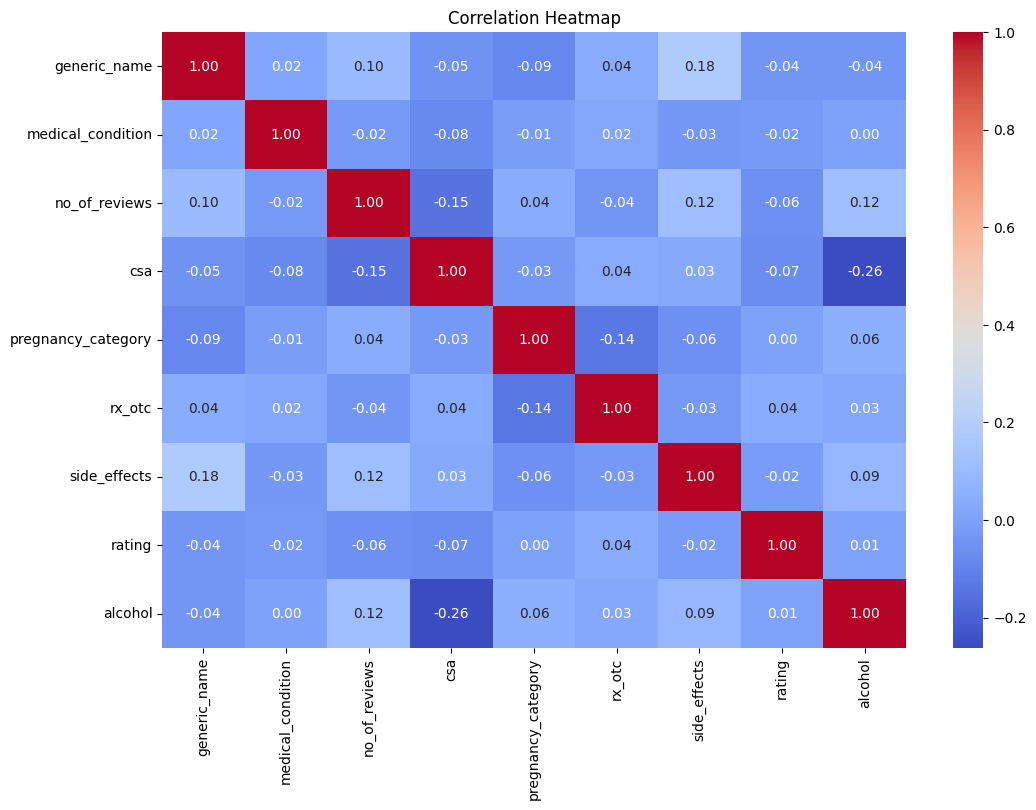

In [219]:
plt.figure(figsize=(12, 8))
sns.heatmap(df4.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [220]:
# Read the new version dataset
df5=pd.read_csv('drugs_side_effects_drugs_com_version2.csv')

In [221]:
# Importing necessary libraries
from mlxtend.frequent_patterns import apriori,association_rules

In [222]:
# Check for occurrence and frequency of medical conditions, sorted from highest to lowest
medical_condition_counts = df5['medical_condition'].value_counts().sort_values(ascending=False)
print("\nMedical condition occurrence and frequency (sorted from highest to lowest):")
print(medical_condition_counts)


Medical condition occurrence and frequency (sorted from highest to lowest):
medical_condition
Pain                    264
Colds & Flu             245
Acne                    238
Hypertension            177
Osteoarthritis          129
Hayfever                124
Eczema                  122
AIDS/HIV                109
Diabetes (Type 2)       104
Psoriasis                93
GERD (Heartburn)         77
Pneumonia                72
Angina                   71
Bronchitis               71
Migraine                 61
Insomnia                 60
Constipation             60
Diabetes (Type 1)        57
Osteoporosis             56
ADHD                     55
Depression               51
Seizures                 50
Bipolar Disorder         47
UTI                      46
Asthma                   45
Anxiety                  45
Cholesterol              45
Diarrhea                 38
Covid 19                 34
Rheumatoid Arthritis     33
Alzheimer's              27
Weight Loss              23
COPD     

In [223]:
# Save the results to CSV files if needed
medical_condition_counts.to_csv('medical_condition_counts.csv')

In [ ]:
from collections import Counter
import re

# Function to extract and clean side effects
def extract_side_effects(text):
    if pd.isna(text):
        return []
    text = text.lower()
    # Remove brackets and dashes
    text = re.sub(r'[()\-]', '', text)
    # Split by commas or semicolons
    effects = re.split(r'[;,]', text)
    # Clean extra spaces
    return [effect.strip() for effect in effects if effect.strip()]

# Apply to the side_effects column
df5['parsed_side_effects'] = df5['side_effects'].apply(extract_side_effects)

# Flatten all side effects into one list
all_side_effects = [effect for effects in df5['parsed_side_effects'] for effect in effects]

# Count occurrences
side_effect_counts = Counter(all_side_effects)

# Convert to DataFrame and sort
side_effect_df = pd.DataFrame(side_effect_counts.items(), columns=['side_effect', 'count'])
side_effect_df = side_effect_df.sort_values(by='count', ascending=False)

# Display top results
print("Top 20 most frequent side effects:\n")
print(side_effect_df.head(20))

# Save the results to a CSV
side_effect_df.to_csv("side_effect_occurrences.csv", index=False)
print("\n Side effect counts saved to 'side_effect_occurrences.csv'")


Top 20 most frequent side effects:

               side_effect  count
47                    lips   2273
48                  tongue   2129
0                    hives   1961
46   swelling of your face   1713
1      difficult breathing   1257
30                  nausea   1183
57                vomiting   1182
88                 itching   1142
29               dizziness    817
84                diarrhea    806
56               confusion    705
848           constipation    693
7                    fever    636
114               headache    623
33        loss of appetite    605
161      trouble breathing    597
236                   face    523
461         blurred vision    503
304               wheezing    498
35               tiredness    490

✅ Side effect counts saved to 'side_effect_occurrences.csv'


In [225]:
# Function to extract drug classes from text, split by commas
def extract_drug_classes(text):
    # Split the text on commas then strip whitespace
    return [effect.strip() for effect in re.split(r'[,]', text)]
# Extract and count occurrences of drug classes
drug_classes = df5['drug_classes'].dropna().apply(extract_drug_classes).explode()
drug_classes_counts = drug_classes.value_counts().sort_values(ascending=False)
print("\nDrug Classes occurrence and frequency (sorted from highest to lowest):")
print(drug_classes_counts)


Drug Classes occurrence and frequency (sorted from highest to lowest):
drug_classes
Upper respiratory combinations           245
Topical acne agents                      125
Topical steroids                          94
Antihistamines                            82
Unknown                                   82
                                        ... 
Immune globulins                           1
Smoking cessation agents                   1
Mouth and throat products                  1
Skeletal muscle relaxant combinations      1
Anthelmintics                              1
Name: count, Length: 244, dtype: int64


In [226]:
# Save the drug classes counts to a CSV file
drug_classes_counts.to_csv('drug_classes_counts.csv')

In [227]:
# Define functions to check for specific side effects and create new boolean columns
def has_hives(text):
    return 'hives' in text.lower()
df5['Hives']= df5['side_effects'].apply(has_hives)
def has_difficult_breathing(text):
    return 'difficult breathing' in text.lower() or 'difficulty breathing' in text.lower()
df5['Difficult Breathing']= df5['side_effects'].apply(has_difficult_breathing)
def has_itching(text):
    return 'itching' in text.lower()
df5['Itching']= df5['side_effects'].apply(has_itching)

In [228]:
# Define functions to check for specific drug classes and create new boolean columns
def is_usc(text):
    return 'Upper respiratory combinations' in text
df5['Upper respiratory combinations']= df5['drug_classes'].apply(is_usc)
def is_steriods(text):
    return 'Topical steroids' in text
df5['Topical steroids']= df5['drug_classes'].apply(is_steriods)
def is_acne(text):
    return 'Topical acne agents' in text
df5['Topical acne agents']= df5['drug_classes'].apply(is_acne)

In [229]:
# Define functions to check for specific medical conditions and create new boolean columns
def has_pain(text):
    return 'Pain' in text
df5['Pain']= df5['medical_condition'].apply(has_pain)
def has_colds_and_flu(text):
    return 'Colds & Flu' in text
df5['Colds & Flu']= df5['medical_condition'].apply(has_colds_and_flu)
def has_acne(text):
    return 'Acne' in text
df5['Acne']= df5['medical_condition'].apply(has_acne)

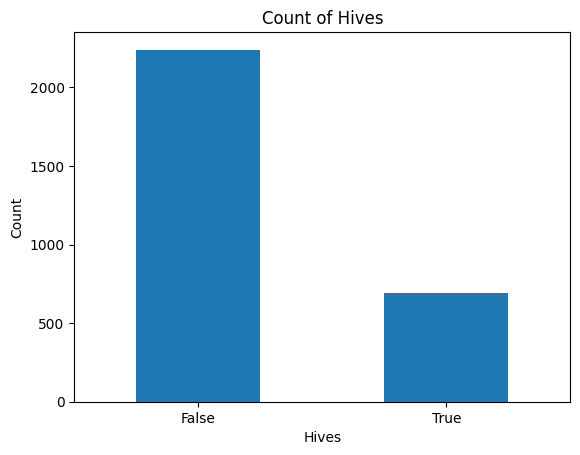

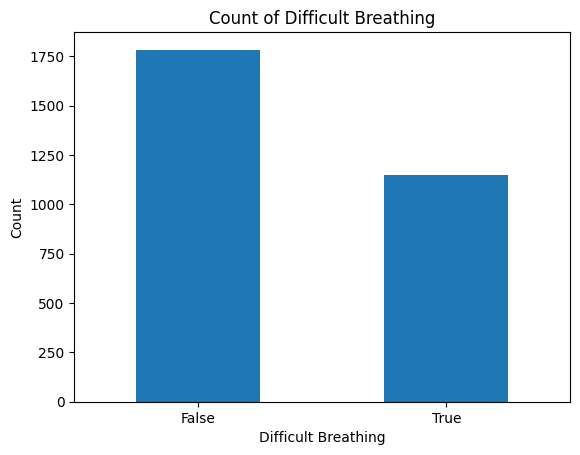

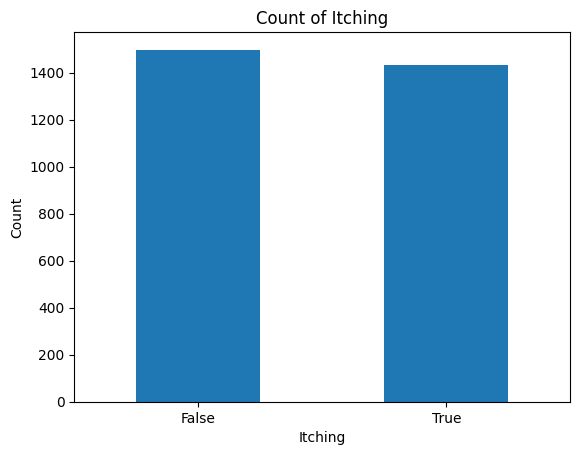

In [230]:
# Plot count of Hives
df5['Hives'].value_counts().plot(kind='bar')
plt.title('Count of Hives')
plt.xlabel('Hives')
plt.ylabel('Count')
plt.xticks([0, 1], ['False', 'True'], rotation=0)
plt.show()

# Plot count of Difficult Breathing
df5['Difficult Breathing'].value_counts().plot(kind='bar')
plt.title('Count of Difficult Breathing')
plt.xlabel('Difficult Breathing')
plt.ylabel('Count')
plt.xticks([0, 1], ['False', 'True'], rotation=0)
plt.show()

# Plot count of Itching
df5['Itching'].value_counts().plot(kind='bar')
plt.title('Count of Itching')
plt.xlabel('Itching')
plt.ylabel('Count')
plt.xticks([0, 1], ['False', 'True'], rotation=0)
plt.show()

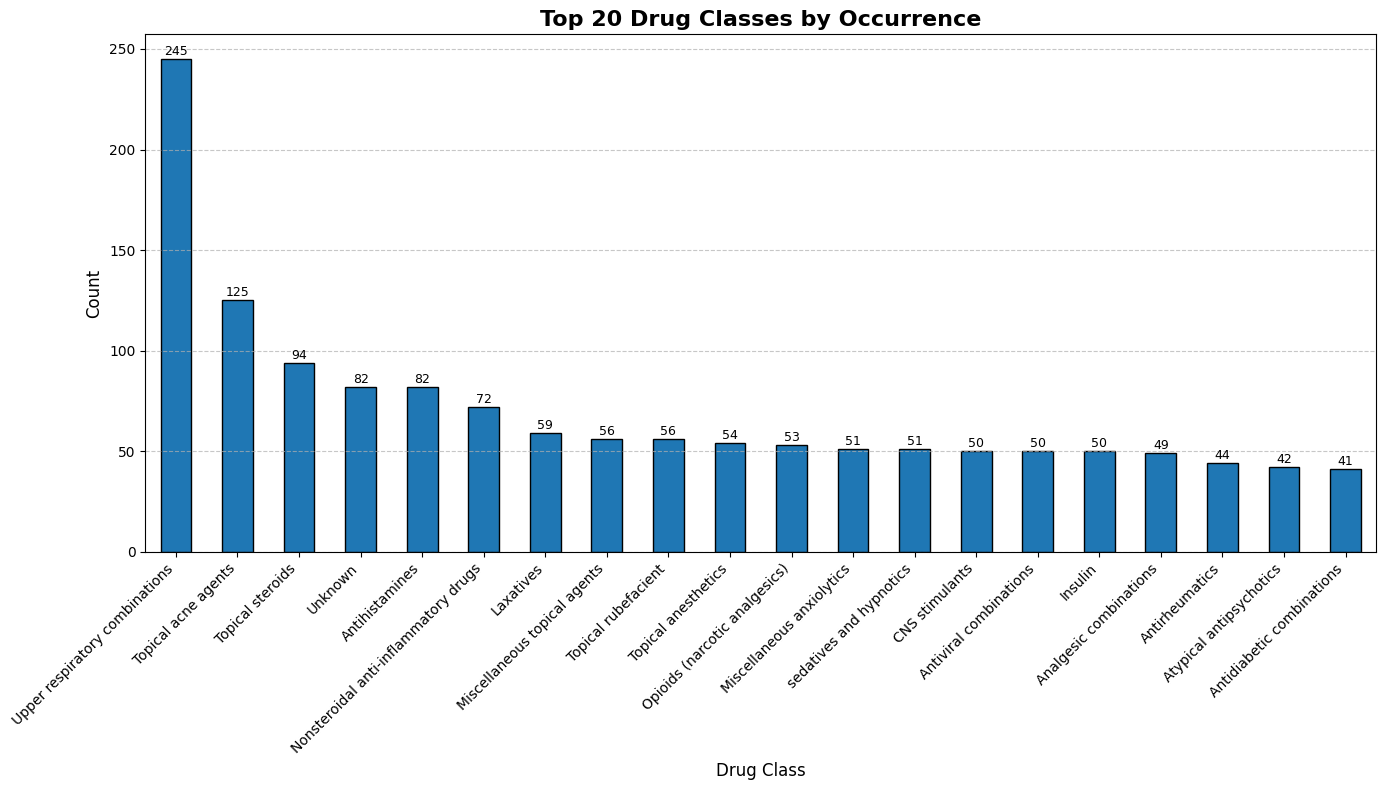

In [234]:
# Split multiple drug classes and count occurrences
drug_class_counts = (
    df['drug_classes']
    .dropna()                         # Remove missing values
    .str.split(',')                   # Split multiple classes per drug
    .explode()                        # Expand each class into its own row
    .str.strip()                      # Remove extra spaces
    .value_counts()                   # Count occurrences
)

# Plot top 20 most frequent drug classes
plt.figure(figsize=(14, 8))
drug_class_counts.head(20).plot(kind='bar', edgecolor='black')

# Enhance readability
plt.title("Top 20 Drug Classes by Occurrence", fontsize=16, fontweight='bold')
plt.xlabel("Drug Class", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add count labels above bars
for index, value in enumerate(drug_class_counts.head(20)):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

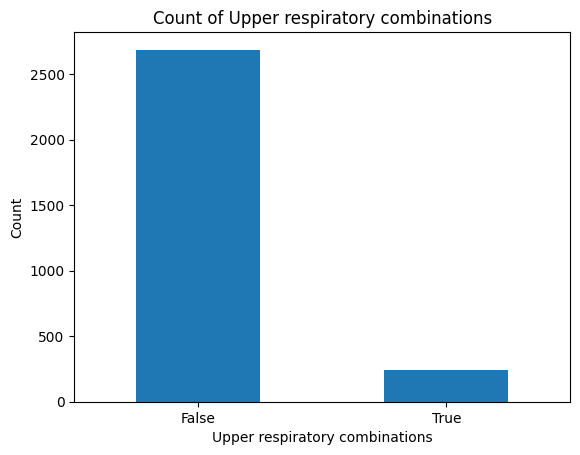

In [235]:
# Plot count of Upper respiratory combinations
df5['Upper respiratory combinations'].value_counts().plot(kind='bar')
plt.title('Count of Upper respiratory combinations')
plt.xlabel('Upper respiratory combinations')
plt.ylabel('Count')
plt.xticks([0, 1], ['False', 'True'], rotation=0)
plt.show()

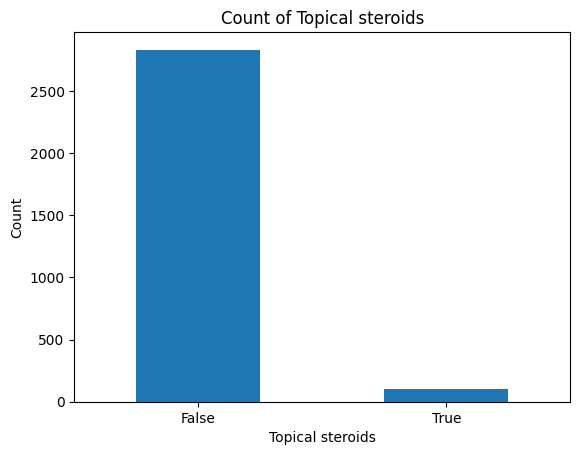

In [236]:
# Plot count of Topical steroids
df5['Topical steroids'].value_counts().plot(kind='bar')
plt.title('Count of Topical steroids')
plt.xlabel('Topical steroids')
plt.ylabel('Count')
plt.xticks([0, 1], ['False', 'True'], rotation=0)
plt.show()

## Conclusion

This project highlights how exploratory data analysis can be used
to gain insights from medical datasets and support healthcare research.